In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('salary_data_cleaned.csv')

In [4]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,python_yn,r_yn,spark_yn,aws_yn,azure_yn,sql_yn,ml_yn,stats_yn,math_yn,prob_yn
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\r\nLocation: Albuquerque, NM\r\...",3.8,Tecolote Research\r\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,1,0,0,0,0,0,1,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\r\n\r\nI. General Summary\r\...,3.4,University of Maryland Medical System\r\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,1,0,0,0,0,0,1,0,1,1
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\r\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,1,0,1,0,0,1,1,0,1,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\r\nJob ID: 310709\r...,3.8,PNNL\r\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,1,0,0,0,0,0,1,0,1,1
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\r\nAffinity Solutions / Marketi...,2.9,Affinity Solutions\r\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,1,0,0,0,0,1,1,0,1,1


In [5]:
df.columns


Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'r_yn',
       'spark_yn', 'aws_yn', 'azure_yn', 'sql_yn', 'ml_yn', 'stats_yn',
       'math_yn', 'prob_yn'],
      dtype='object')

In [6]:
df['job_state']

0       NM
1       MD
2       FL
3       WA
4       NY
5       TX
6       MD
7       CA
8       NY
9       NY
10      CA
11      VA
12      TX
13      WA
14      MA
15      NJ
16      MA
17      CA
18      CA
19      CO
20      WA
21      TX
22      IL
23      KY
24      VA
25      MA
26      OR
27      MA
28      CT
29      FL
      ... 
712     CA
713     MD
714     PA
715     NC
716     CA
717     OH
718     IN
719     FL
720     MA
721     NY
722     IL
723     VA
724     MA
725     NC
726     CA
727     CA
728     GA
729     NY
730     MA
731     MA
732     CA
733     CA
734     MA
735     CA
736     PA
737     MA
738     TN
739     PA
740     PA
741     OH
Name: job_state, Length: 742, dtype: object

In [7]:
def title_simplifier(title):
    if 'scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'

def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'junior' in title.lower() or 'jr' in title.lower():
        return 'junior'
    else:
        return 'na'

    

In [8]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)

In [9]:
df['job_simp'].value_counts()

data scientist    438
data engineer     119
analyst           100
na                 41
manager            21
mle                12
director           11
Name: job_simp, dtype: int64

In [10]:
df['seniority'] = df['Job Title'].apply(seniority)
df['seniority'].value_counts()

na        519
senior    220
junior      3
Name: seniority, dtype: int64

In [11]:
#fix state Los Angles
df.job_state.value_counts()

 CA             151
 MA             103
 NY              72
 VA              41
 IL              40
 MD              35
 PA              33
 TX              28
 WA              21
 NC              21
 NJ              17
 FL              16
 OH              14
 TN              13
 CO              11
 DC              11
 UT              10
 IN              10
 WI              10
 MO               9
 AZ               9
 AL               8
 MI               6
 GA               6
 DE               6
 KY               6
 CT               5
 IA               5
 NE               4
 OR               4
 LA               4
 NM               3
 KS               3
 ID               2
 MN               2
 RI               1
 SC               1
 Los Angeles      1
Name: job_state, dtype: int64

In [12]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'r_yn',
       'spark_yn', 'aws_yn', 'azure_yn', 'sql_yn', 'ml_yn', 'stats_yn',
       'math_yn', 'prob_yn', 'job_simp', 'seniority'],
      dtype='object')

In [13]:
df['job_state'] = df.job_state.apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'CA')

In [14]:
df['job_state'].value_counts()

CA    152
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
WA     21
NC     21
NJ     17
FL     16
OH     14
TN     13
CO     11
DC     11
UT     10
WI     10
IN     10
MO      9
AZ      9
AL      8
KY      6
DE      6
GA      6
MI      6
CT      5
IA      5
LA      4
OR      4
NE      4
KS      3
NM      3
MN      2
ID      2
RI      1
SC      1
Name: job_state, dtype: int64

In [15]:
df['job state'] = df['job_state'].apply(lambda x: 'CA' if x.strip().lower() == 'los angeles' else x.strip())

In [16]:
df['job state'].value_counts()

CA    152
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
WA     21
NC     21
NJ     17
FL     16
OH     14
TN     13
CO     11
DC     11
UT     10
WI     10
IN     10
MO      9
AZ      9
AL      8
KY      6
DE      6
GA      6
MI      6
CT      5
IA      5
LA      4
OR      4
NE      4
KS      3
NM      3
MN      2
ID      2
RI      1
SC      1
Name: job state, dtype: int64

In [17]:
df.drop(['job state'], inplace = True, axis =1 )

In [18]:
# Job description length
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0      2555
1      4828
2      3495
3      3926
4      2748
5      3783
6      1808
7      3847
8      1561
9      4609
10     2789
11     3522
12     3980
13     4942
14     3799
15     1902
16     3676
17     4201
18     3549
19     4434
20     2944
21     6967
22     6472
23     2951
24     3806
25     3728
26     4452
27     4984
28     5057
29     3495
       ... 
712    3761
713    3809
714    2352
715    7209
716    3943
717    2895
718    2331
719    6255
720    3841
721    2504
722    5374
723    3299
724    1866
725    7444
726    3401
727    3721
728    4654
729    4755
730    3334
731    2786
732    3526
733    5777
734    5071
735    3849
736    5064
737    6219
738    6167
739    3107
740    1678
741    3710
Name: desc_len, Length: 742, dtype: int64

In [19]:
df.Competitors

0                                                     -1
1                                                     -1
2                                                     -1
3      Oak Ridge National Laboratory, National Renewa...
4                   Commerce Signals, Cardlytics, Yodlee
5                      Digital Realty, CoreSite, Equinix
6                                                     -1
7                                                     -1
8                                                     -1
9                              Clicktripz, SmarterTravel
10                                                    -1
11                                                    -1
12                      Target, Costco Wholesale, Amazon
13                                                    -1
14                              Novartis, Baxter, Pfizer
15                                                    -1
16          bluebird bio, Agios Pharmaceuticals, Celgene
17                             

In [20]:
# Competitors count

df['num_comp'] = df['Competitors'].apply(lambda x: len(x.split()) if x!= '-1' else 0)
df.num_comp


0       0
1       0
2       0
3      12
4       4
5       4
6       0
7       0
8       0
9       2
10      0
11      0
12      4
13      0
14      3
15      0
16      5
17      0
18      0
19      0
20      4
21      0
22      0
23      0
24      6
25      0
26      0
27      0
28      0
29      0
       ..
712     6
713     0
714     0
715     0
716     6
717     0
718     0
719     4
720     0
721     5
722     0
723     4
724     0
725     0
726     0
727     0
728     0
729     0
730     0
731     0
732     0
733     0
734     0
735     2
736     6
737     3
738     4
739     0
740     0
741     0
Name: num_comp, Length: 742, dtype: int64

In [21]:
#houly wage to annual
df[['min_salary','max_salary','hourly']]


,min_salary,max_salary,hourly
0,53,91,0
1,63,112,0
2,80,90,0
3,56,97,0
4,86,143,0
5,71,119,0
6,54,93,0
7,86,142,0
8,38,84,0
9,120,160,0


In [22]:
#houly wage to annual

df['min_salary'] = df.apply(lambda x: x.min_salary *2000/1000 if x.hourly == 1 else x.min_salary, axis = 1)
df['max_salary'] = df.apply(lambda x: x.max_salary *2000/1000 if x.hourly == 1 else x.max_salary, axis = 1)


In [23]:
df[df['hourly'] == 1][['min_salary', 'max_salary', 'hourly']]

,min_salary,max_salary,hourly
165,34.0,48.0,1
177,42.0,68.0,1
197,36.0,50.0,1
202,42.0,68.0,1
210,30.0,50.0,1
246,34.0,48.0,1
271,42.0,68.0,1
337,36.0,50.0,1
345,48.0,78.0,1
357,42.0,68.0,1


In [24]:
#remove newline character from company title
df.company_txt = df.company_txt.apply(lambda x: x.replace("\r\n",''))

In [25]:
df.company_txt

0                          Tecolote Research
1      University of Maryland Medical System
2                                    KnowBe4
3                                       PNNL
4                         Affinity Solutions
5                                   CyrusOne
6                         ClearOne Advantage
7                                 Logic20/20
8                  Rochester Regional Health
9                                   <intent>
10                                      Wish
11                                   ManTech
12                                   Walmart
13                                    Yesler
14                    Takeda Pharmaceuticals
15                                   Audible
16                       Blueprint Medicines
17                                    h2o.ai
18                                      Nuna
19                        Pinnacol Assurance
20                                     Porch
21                                 Health IQ
22        

In [26]:
df.describe()

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,same_state,age,python_yn,...,spark_yn,aws_yn,azure_yn,sql_yn,ml_yn,stats_yn,math_yn,prob_yn,desc_len,num_comp
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,...,742.000000,742.000000,742.000000,742.000000,742.0,742.0,742.000000,742.0,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,100.626011,0.557951,46.591644,0.528302,...,0.225067,0.237197,0.072776,0.512129,1.0,0.0,0.261456,1.0,3910.172507,1.814016
std,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,38.855948,0.496965,53.778815,0.499535,...,0.417908,0.425651,0.259944,0.500190,0.0,0.0,0.439724,0.0,1533.827777,2.738326
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.000000,1.0,407.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,11.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.000000,1.0,2834.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,24.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,1.0,0.0,0.000000,1.0,3781.500000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,59.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,1.0,0.0,1.000000,1.0,4772.000000,4.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,276.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.0,0.0,1.000000,1.0,10146.000000,14.000000


In [27]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'r_yn',
       'spark_yn', 'aws_yn', 'azure_yn', 'sql_yn', 'ml_yn', 'stats_yn',
       'math_yn', 'prob_yn', 'job_simp', 'seniority', 'desc_len', 'num_comp'],
      dtype='object')

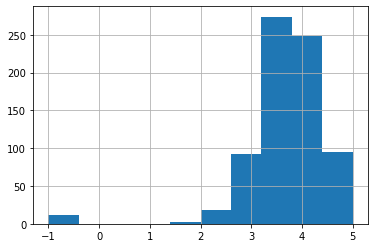

In [28]:
df.Rating.hist()

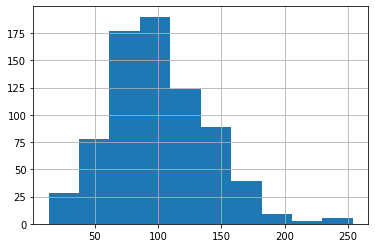

In [29]:
df.avg_salary.hist()

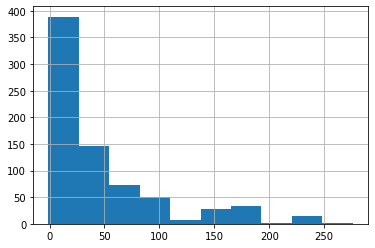

In [30]:
df.age.hist()

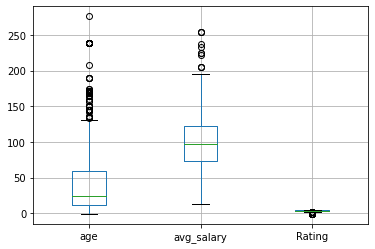

In [31]:
df.boxplot(column = ['age','avg_salary','Rating'])

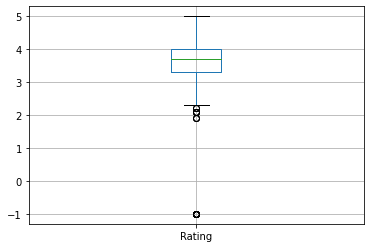

In [32]:
df.boxplot(column = ['Rating'])

In [33]:
df[['age','avg_salary','Rating','desc_len']].corr()

,age,avg_salary,Rating,desc_len
age,1.000000,0.019655,0.021655,0.165090
avg_salary,0.019655,1.000000,0.013492,0.078093
Rating,0.021655,0.013492,1.000000,-0.012631
desc_len,0.165090,0.078093,-0.012631,1.000000


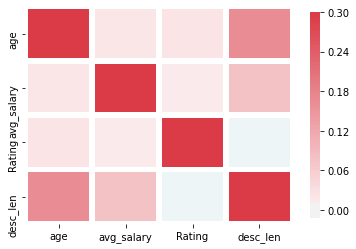

In [34]:
cmap = sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(df[['age','avg_salary','Rating','desc_len']].corr(), vmax= .3, center=0, cmap=cmap, 
               square=False, linewidths=4.5, cbar_kws={'shrink': .95})

In [35]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'r_yn',
       'spark_yn', 'aws_yn', 'azure_yn', 'sql_yn', 'ml_yn', 'stats_yn',
       'math_yn', 'prob_yn', 'job_simp', 'seniority', 'desc_len', 'num_comp'],
      dtype='object')

In [36]:
df_cat = df[['Location','Headquarters','Size', 'Type of ownership','Industry', 'Sector','Revenue','company_txt', 'job_state', 'spark_yn', 'aws_yn', 'azure_yn', 'sql_yn', 'ml_yn', 'stats_yn',
       'math_yn', 'prob_yn','r_yn', 'job_simp', 'seniority']]

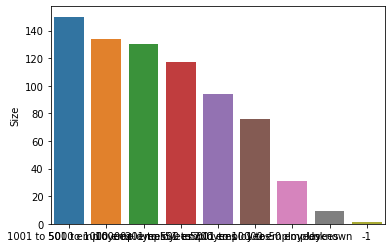

In [37]:
#for i in df_cat.columns:
#    cat_num = df_cat[i]
#    cat_num
    
#df_cat['Size'].value_counts().index
sns.barplot(x=df_cat['Size'].value_counts().index, y = df_cat['Size'].value_counts() )
plt.show()

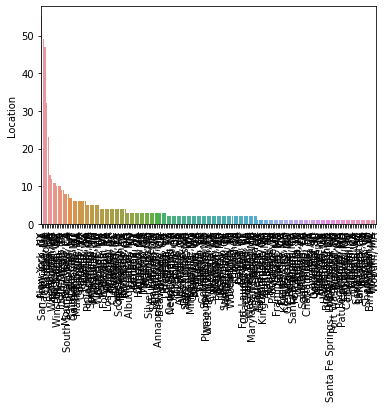

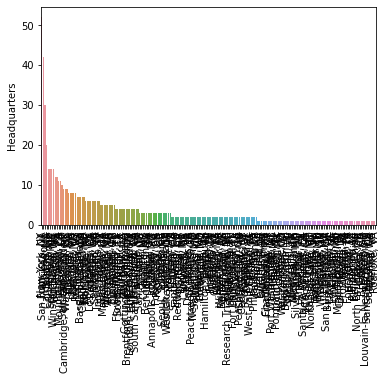

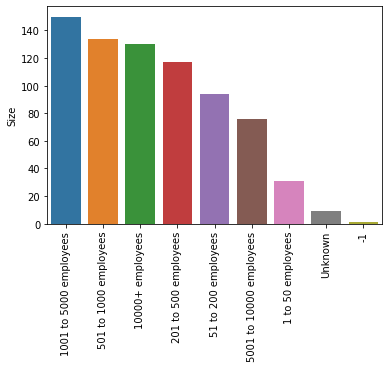

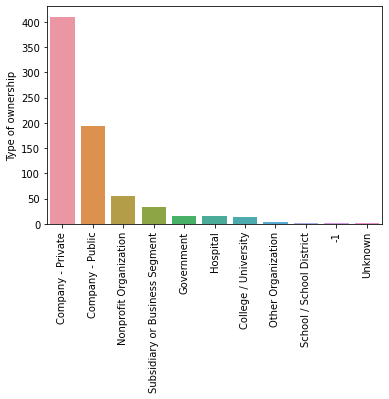

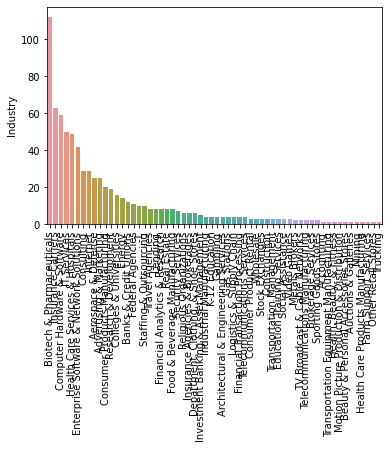

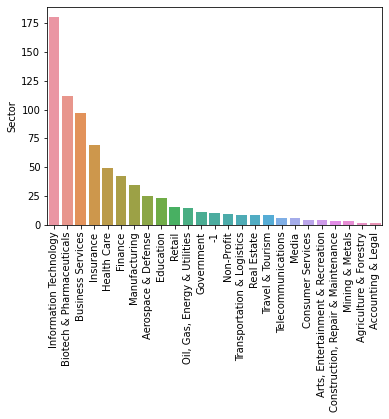

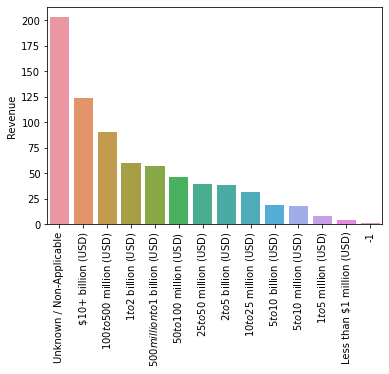

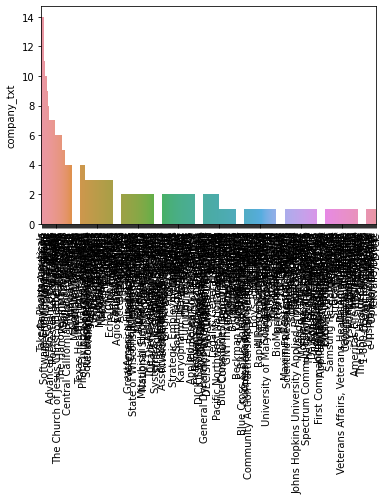

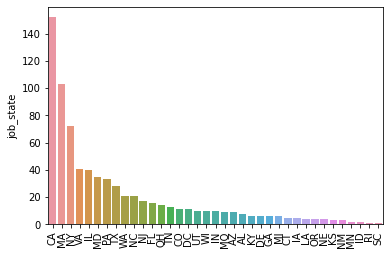

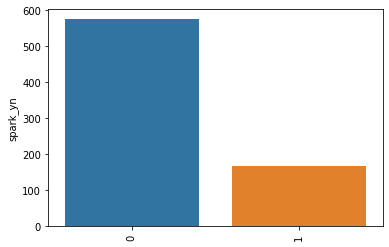

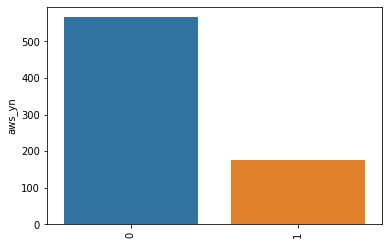

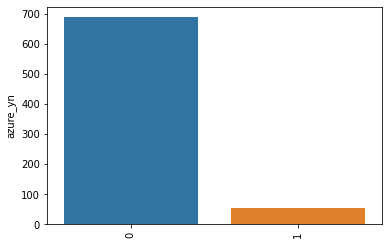

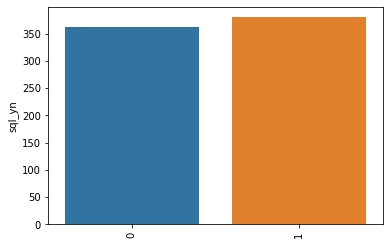

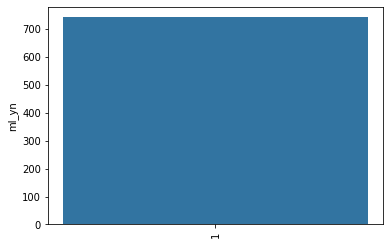

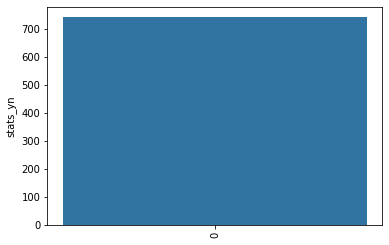

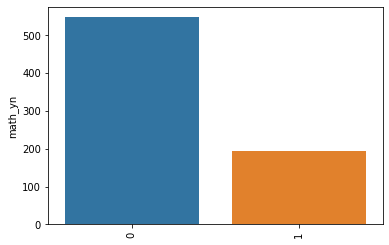

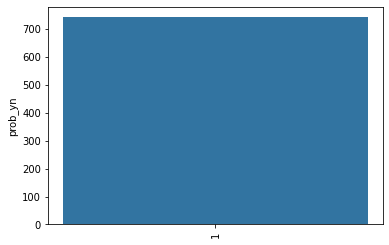

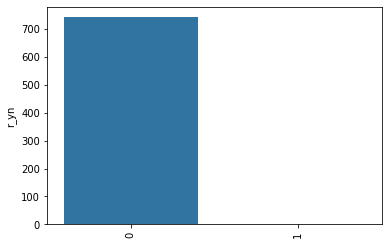

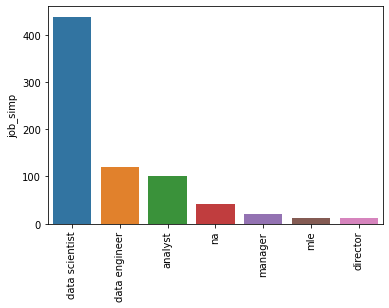

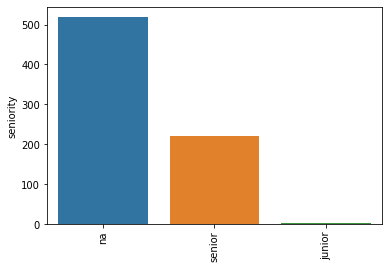

In [38]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    chart = sns.barplot(x = cat_num.index, y = cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
#    sns.barplot(x=cat_num.index, y = cat_num)
    plt.show()

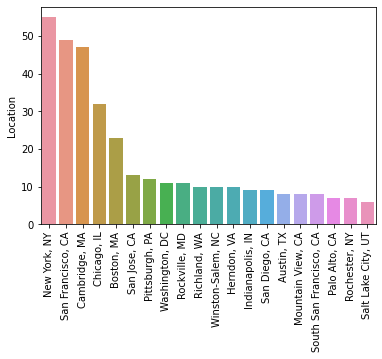

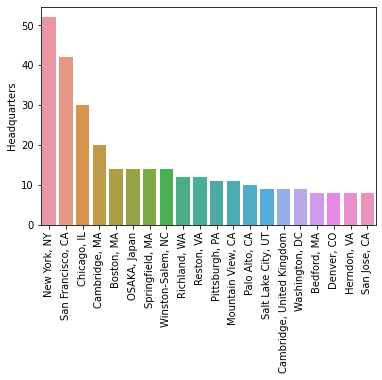

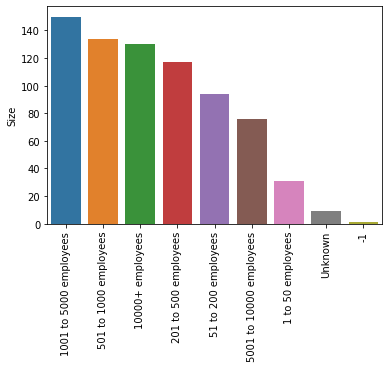

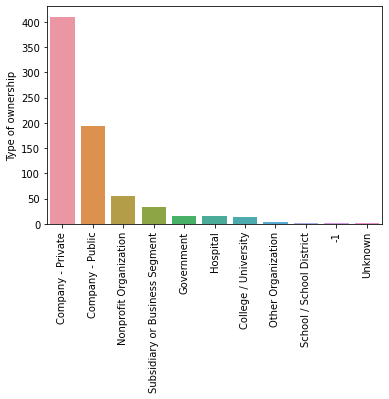

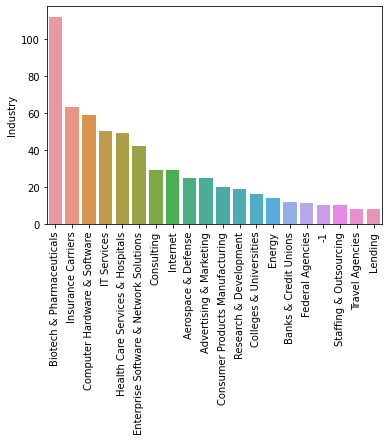

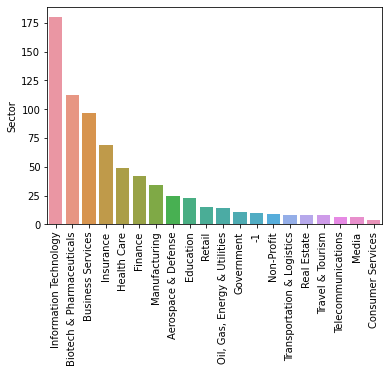

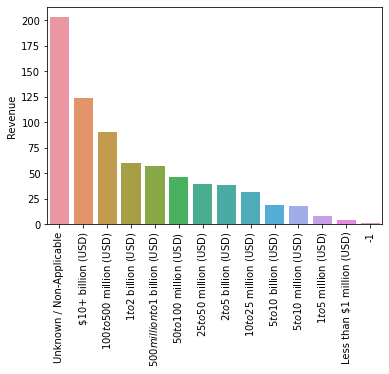

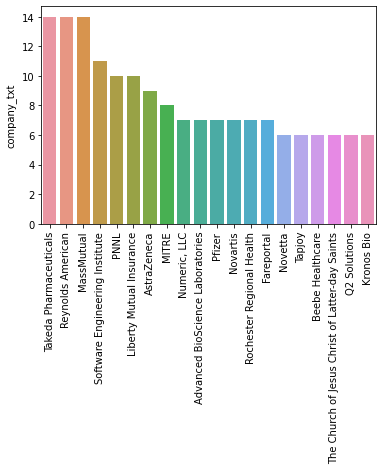

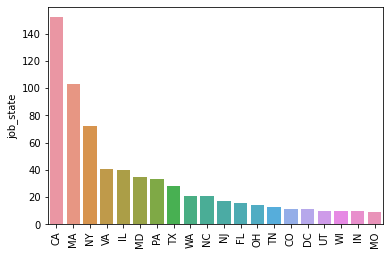

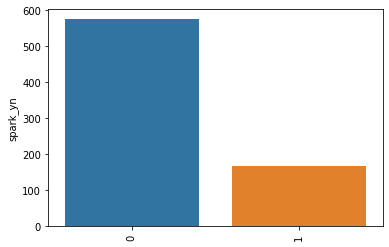

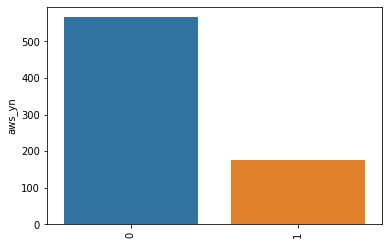

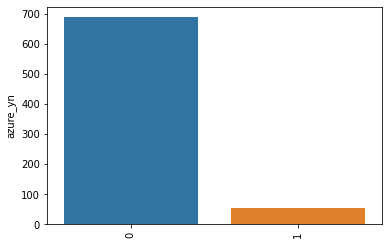

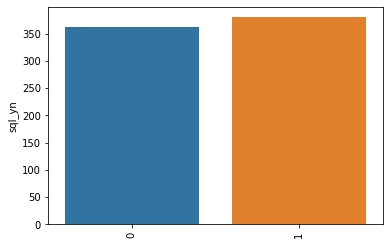

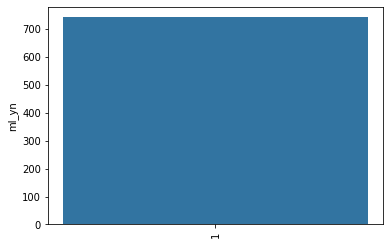

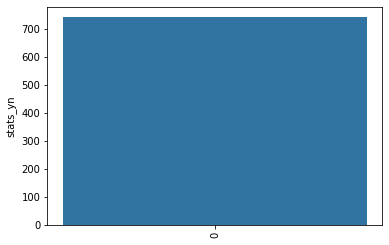

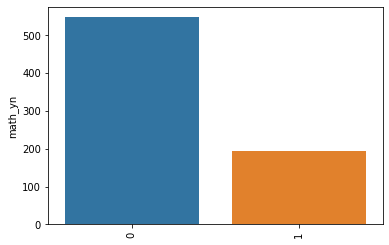

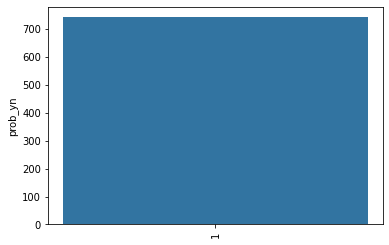

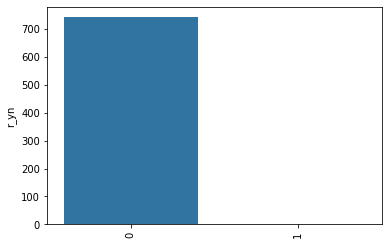

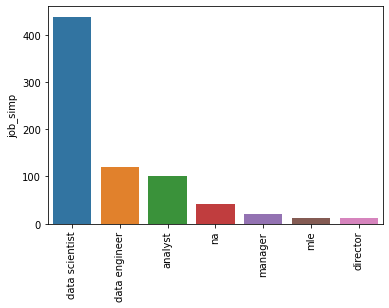

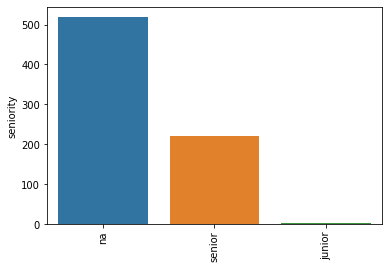

In [39]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()[:20]
    chart = sns.barplot(x = cat_num.index, y = cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
#    sns.barplot(x=cat_num.index, y = cat_num)
    plt.show()

In [40]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'r_yn',
       'spark_yn', 'aws_yn', 'azure_yn', 'sql_yn', 'ml_yn', 'stats_yn',
       'math_yn', 'prob_yn', 'job_simp', 'seniority', 'desc_len', 'num_comp'],
      dtype='object')

In [41]:


#pd.pivot_table(df, index = 'job_simp', value = [['avg_salary', 'aws_yn', 'r_yn','python_yn','sql_yn','min_salary','Size']])

pd.pivot_table(df, index = 'job_simp', values = ['avg_salary', 'aws_yn', 'r_yn','python_yn','sql_yn','min_salary','Size'])




,avg_salary,aws_yn,min_salary,python_yn,r_yn,sql_yn
job_simp,,,,,,
analyst,65.235000,0.100000,46.550000,0.320000,0.01,0.740000
data engineer,105.403361,0.495798,76.151261,0.647059,0.00,0.731092
data scientist,107.004566,0.212329,80.687215,0.531963,0.00,0.383562
director,173.500000,0.181818,133.272727,0.727273,0.00,0.272727
manager,83.428571,0.095238,57.619048,0.285714,0.00,0.619048
mle,119.958333,0.333333,87.916667,1.000000,0.00,0.750000
na,88.536585,0.146341,64.707317,0.585366,0.00,0.634146


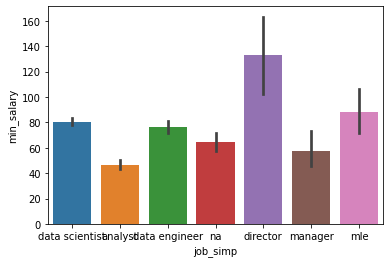

In [42]:
sns.barplot(x = df.job_simp, y = df.min_salary )

In [43]:
df.job_simp.value_counts()

data scientist    438
data engineer     119
analyst           100
na                 41
manager            21
mle                12
director           11
Name: job_simp, dtype: int64

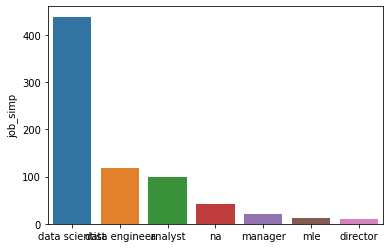

In [44]:
barchart = sns.barplot( x = df.job_simp.value_counts().index, y = df.job_simp.value_counts() )
#barchart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
plt.show()


In [45]:
pd.pivot_table(df, index = ['job_state','job_simp'], values = ['avg_salary'], aggfunc='count').sort_values('job_state', ascending=False)


avg_salary
job_state job_simp                  
WI        data scientist           7
          analyst                  3
WA        data scientist          18
          analyst                  3
VA        na                       5
          mle                      2
          data scientist          18
          data engineer           10
          analyst                  6
UT        data engineer            3
          analyst                  4
          data scientist           3
TX        data scientist          20
          data engineer            8
TN        data scientist           1
          data engineer           10
          analyst                  2
SC        data scientist           1
RI        analyst                  1
PA        na                       2
          manager                  3
          data scientist          19
          data engineer            1
          analyst                  8
OR        data engineer            1
          data scientist           3
OH        data scientist          10
          analyst                  4
NY        na                       2
          mle                      2
...                              ...
IA        data engineer            3
          analyst                  2
GA        data scientist           6
FL        data engineer            3
          analyst                  6
          data scientist           7
DE        data scientist           6
DC        data scientist           5
          data engineer            4
          analyst                  2
CT        na                       3
          data scientist           2
CO        analyst                  1
          data scientist           6
          data engineer            3
          mle                      1
CA        na                       7
          mle                      4
          manager                  9
          data scientist          90
          data engineer           25
          analyst                 17
AZ        data scientist           1
          data engineer            5
          analyst                  1
          na                       2
AL        data scientist           1
          data engineer            1
          na                       1
          analyst                  5

[104 rows x 1 columns]

In [46]:
pd.pivot_table(df[df['job_simp']=='analyst'], index = ['job_state','job_simp'], values = ['avg_salary'], aggfunc='count').sort_values('job_state', ascending=False)


,,avg_salary
job_state,job_simp,
WI,analyst,3
WA,analyst,3
VA,analyst,6
UT,analyst,4
TN,analyst,2
RI,analyst,1
PA,analyst,8
OH,analyst,4
NY,analyst,14


In [47]:
df_pivots = df[['Rating',
       'Company Name', 'Location', 'Size', 
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'company_txt', 'job_state',  'age', 'python_yn',
       'spark_yn', 'aws_yn', 'azure_yn', 'sql_yn', 'stats_yn',
       'math_yn', 'prob_yn', 'job_simp',  'desc_len', 'num_comp','avg_salary']]

In [48]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots, index = i, values = 'avg_salary').sort_values('avg_salary', ascending = False ))

Rating
        avg_salary
Rating            
-1.0    136.181818
 5.0    134.700000
 2.5    120.000000
 4.5    117.714286
 4.1    116.368421
 3.9    113.071429
 2.6    109.083333
 4.4    108.606061
 3.2    105.500000
 4.0    105.340426
 3.5    104.897959
 3.7    104.131148
 4.7    103.983871
 4.3    102.468750
 3.3    101.858974
 4.2    100.442308
 2.2     97.750000
 4.6     97.250000
 3.8     96.811475
 2.1     95.900000
 3.4     93.011364
 1.9     87.500000
 3.1     86.580000
 3.0     85.588235
 3.6     85.467391
 2.8     83.928571
 2.7     83.250000
 2.3     81.500000
 2.9     81.138889
 4.8     80.277778
 2.4     60.214286
Company Name
                                                    avg_salary
Company Name                                                  
Gallup\r\n4.2                                       237.500000
Sage Intacct\r\n4.7                                 232.500000
CA-One Tech Cloud                                   225.000000
Grand Rounds\r\n4.2                   

0        99.647790
stats_yn
          avg_salary
stats_yn            
0         100.626011
math_yn
         avg_salary
math_yn            
1        103.000000
0         99.785584
prob_yn
         avg_salary
prob_yn            
1        100.626011
job_simp
                avg_salary
job_simp                  
director        173.500000
mle             119.958333
data scientist  107.004566
data engineer   105.403361
na               88.536585
manager          83.428571
analyst          65.235000
desc_len
          avg_salary
desc_len            
4500           254.0
3323           237.5
3886           232.5
1657           225.0
4997           221.5
4077           205.0
3967           194.5
4893           194.0
7325           184.5
2037           181.0
3233           180.0
2929           179.5
3249           177.0
4798           174.0
4224           173.0
5942           173.0
5734           172.0
3251           172.0
4563           171.5
4789           169.0
7162           169.0
6319     

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [ ]:
sns.scatterplot(x=df.desc_len, y = df.avg_salary)

In [51]:
df.to_csv('C:/Users/Edward Liang/Documents/ds_salary_proj/eda_data.csv')